## Name: Sai Manoj Kumar Penikalapati
## Student ID: 25241477
## Class Code: CT5165

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA

# Data Pre Processing

In [2]:
df_train = pd.read_csv('modified_heart_failure_data.csv')

## Checking the first and last 10 rows of data

In [3]:
df_train.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,patient_id
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0,0
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0,1
2,65.0,NaN,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,NaN,7.0,2
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,NaN,137.0,1.0,0.0,7.0,3
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0,4
5,NaN,1.0,47.0,0.0,NaN,1.0,204000.00,2.1,NaN,1.0,1.0,8.0,5
6,75.0,1.0,246.0,0.0,15.0,0.0,127000.00,1.2,137.0,1.0,NaN,10.0,6
7,60.0,1.0,315.0,1.0,60.0,0.0,454000.00,1.1,131.0,1.0,1.0,10.0,7
8,65.0,0.0,NaN,0.0,65.0,0.0,263358.03,1.5,138.0,0.0,0.0,10.0,8
9,NaN,1.0,123.0,0.0,35.0,NaN,388000.00,9.4,133.0,1.0,NaN,10.0,9


In [4]:
df_train.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,patient_id
289,90.0,1.0,337.0,0.0,38.0,0.0,390000.0,0.9,144.0,0.0,0.0,256.0,289
290,45.0,0.0,615.0,1.0,55.0,0.0,222000.0,0.8,141.0,0.0,0.0,257.0,290
291,60.0,0.0,320.0,0.0,35.0,0.0,133000.0,1.4,139.0,1.0,0.0,258.0,291
292,52.0,0.0,190.0,1.0,38.0,0.0,382000.0,1.0,140.0,1.0,1.0,258.0,292
293,63.0,NaN,103.0,1.0,35.0,0.0,179000.0,0.9,136.0,1.0,1.0,NaN,293
294,62.0,0.0,61.0,1.0,38.0,1.0,NaN,1.1,143.0,1.0,1.0,NaN,294
295,55.0,0.0,1820.0,0.0,38.0,0.0,270000.0,1.2,139.0,0.0,0.0,271.0,295
296,45.0,0.0,2060.0,1.0,60.0,NaN,742000.0,0.8,138.0,0.0,0.0,278.0,296
297,45.0,NaN,NaN,0.0,38.0,NaN,140000.0,1.4,140.0,1.0,1.0,280.0,297
298,50.0,0.0,196.0,0.0,45.0,0.0,395000.0,1.6,136.0,NaN,1.0,285.0,298


## Checking for any Null values in each column

In [5]:
df_train.isnull().any()

age                          True
anaemia                      True
creatinine_phosphokinase     True
diabetes                     True
ejection_fraction            True
high_blood_pressure          True
platelets                    True
serum_creatinine             True
serum_sodium                 True
sex                          True
smoking                      True
time                         True
patient_id                  False
dtype: bool

## Count of null values in each column

In [6]:
df_train.isnull().sum()

age                         29
anaemia                     29
creatinine_phosphokinase    29
diabetes                    29
ejection_fraction           29
high_blood_pressure         29
platelets                   29
serum_creatinine            29
serum_sodium                29
sex                         29
smoking                     29
time                        29
patient_id                   0
dtype: int64

## Rows with atleast one null value

In [7]:
df_train[df_train.isnull().any(axis=1)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,patient_id
2,65.0,NaN,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,NaN,7.0,2
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,NaN,137.0,1.0,0.0,7.0,3
5,NaN,1.0,47.0,0.0,NaN,1.0,204000.00,2.1,NaN,1.0,1.0,8.0,5
6,75.0,1.0,246.0,0.0,15.0,0.0,127000.00,1.2,137.0,1.0,NaN,10.0,6
8,65.0,0.0,NaN,0.0,65.0,0.0,263358.03,1.5,138.0,0.0,0.0,10.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,63.0,NaN,103.0,1.0,35.0,0.0,179000.00,0.9,136.0,1.0,1.0,NaN,293
294,62.0,0.0,61.0,1.0,38.0,1.0,NaN,1.1,143.0,1.0,1.0,NaN,294
296,45.0,0.0,2060.0,1.0,60.0,NaN,742000.00,0.8,138.0,0.0,0.0,278.0,296
297,45.0,NaN,NaN,0.0,38.0,NaN,140000.00,1.4,140.0,1.0,1.0,280.0,297


## Imputating values for better performance

- There are some columns with binary values 0.0, 1.0. For these columns, filling null values with most frequent one [MODE]
- For the columns with continuous values, filling null values with median of the whole column [MEDIAN]

In [8]:
binary_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

for col in df_train.columns:
    if (col in binary_columns):
        df_train[col] = df_train[col].fillna(df_train[col].mode()[0])
    else:
        df_train[col] = df_train[col].fillna(df_train[col].median())

In [9]:
df_train.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,patient_id
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0,0
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0,1
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,0.0,7.0,2
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,1.1,137.0,1.0,0.0,7.0,3
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0,4
5,60.0,1.0,47.0,0.0,38.0,1.0,204000.00,2.1,137.0,1.0,1.0,8.0,5
6,75.0,1.0,246.0,0.0,15.0,0.0,127000.00,1.2,137.0,1.0,0.0,10.0,6
7,60.0,1.0,315.0,1.0,60.0,0.0,454000.00,1.1,131.0,1.0,1.0,10.0,7
8,65.0,0.0,250.0,0.0,65.0,0.0,263358.03,1.5,138.0,0.0,0.0,10.0,8
9,60.0,1.0,123.0,0.0,35.0,0.0,388000.00,9.4,133.0,1.0,0.0,10.0,9


## Checking for missing values after Imputation

In [10]:
df_train.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
patient_id                  0
dtype: int64

## Normalising continuous values for better performance

- Here I am using Robust Scaler to normalise the values. This helps in removing the outliers for this tyoe of data for better scores

In [11]:
continous_columns = [col for col in df_train.columns if col not in binary_columns]

scaler = RobustScaler()

df_train[continous_columns] = scaler.fit_transform(df_train[continous_columns])

df_train = df_train.drop(columns=['patient_id'])

df_train.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.000000,0.0,0.730473,0.0,-1.8,1.0,0.053691,2.285714,-1.555556,1.0,0.0,-0.987234
1,-0.333333,0.0,16.745875,0.0,0.0,0.0,0.031651,0.000000,-0.222222,1.0,0.0,-0.970213
2,0.333333,0.0,-0.228823,0.0,-1.8,0.0,-1.328859,0.571429,-1.777778,1.0,0.0,-0.961702
3,-0.666667,1.0,-0.305831,0.0,-1.8,0.0,-0.684564,0.000000,0.000000,1.0,0.0,-0.961702
4,0.333333,1.0,-0.198020,1.0,-1.8,0.0,0.885906,4.571429,-4.666667,0.0,0.0,-0.953191
5,0.000000,1.0,-0.446645,0.0,0.0,1.0,-0.765101,2.857143,0.000000,1.0,1.0,-0.953191
6,1.000000,1.0,-0.008801,0.0,-2.3,0.0,-1.798658,0.285714,0.000000,1.0,0.0,-0.936170
7,0.000000,1.0,0.143014,1.0,2.2,0.0,2.590604,0.000000,-1.333333,1.0,1.0,-0.936170
8,0.333333,0.0,0.000000,0.0,2.7,0.0,0.031651,1.142857,0.222222,0.0,0.0,-0.936170
9,0.000000,1.0,-0.279428,0.0,-0.3,0.0,1.704698,23.714286,-0.888889,1.0,0.0,-0.936170


# K Means Clustering

- Here I am taking a range of k values from 2 to 40.
- Then calculating silhouette_score, davies_bouldin_score for each iteration seperately and storing them in arrays

In [12]:
k_values = range(2, 41)
sil_scores = []
dbi_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_train)
    score = silhouette_score(df_train, cluster_labels)
    sil_scores.append(score)
    dbi_scores.append(davies_bouldin_score(df_train, cluster_labels))

## Plot of Silhouette Scores along K values

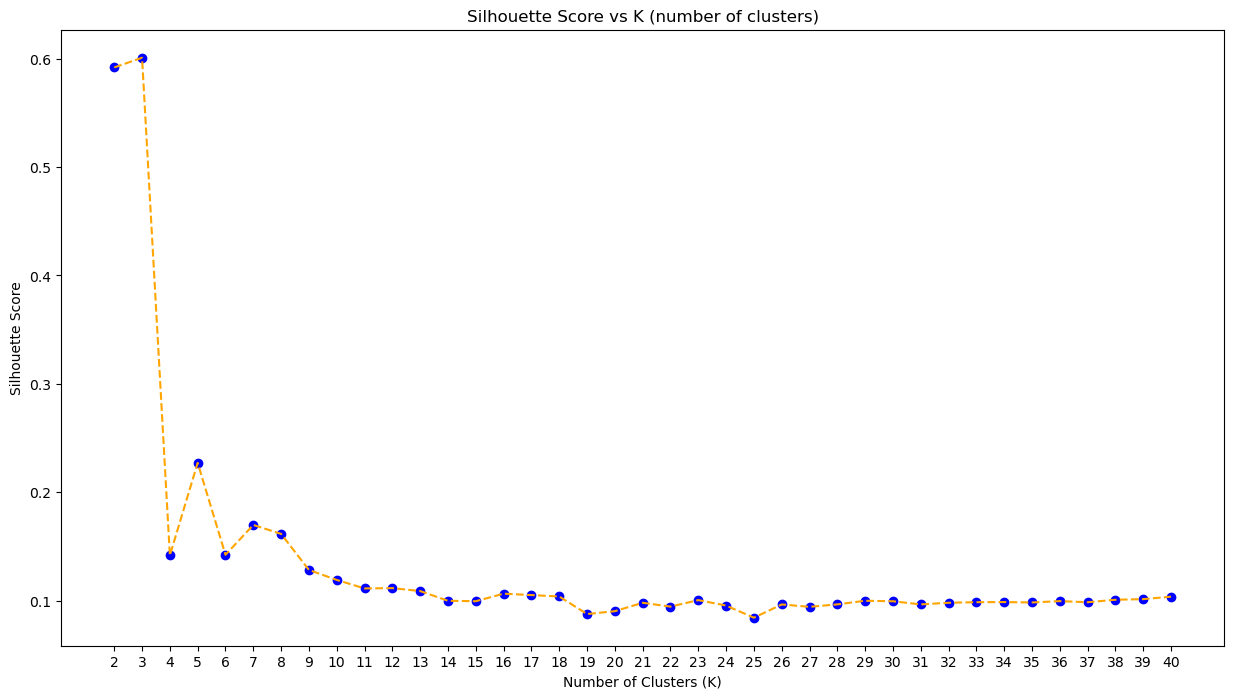

In [13]:
plt.figure(figsize=(15, 8))
plt.scatter(k_values, sil_scores, color='blue')
plt.plot(k_values, sil_scores, color='orange', linestyle='--')
plt.title("Silhouette Score vs K (number of clusters)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.show()

## Plot of Davies Bouldin Scores along K values

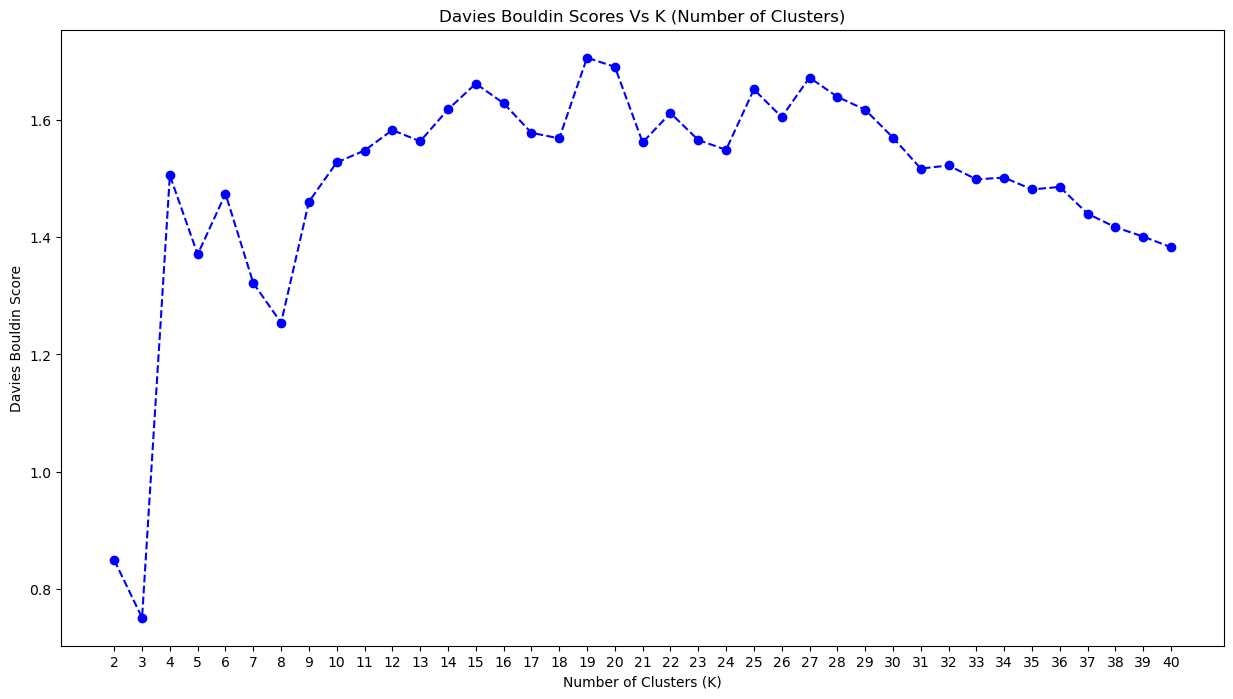

In [14]:
plt.figure(figsize=(15, 8))
plt.plot(k_values, dbi_scores, 'o--', color='blue')
plt.title("Davies Bouldin Scores Vs K (Number of Clusters)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Davies Bouldin Score")
plt.xticks(k_values)
plt.show()

## Best KMeans Cluster

In [15]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_train)

In [16]:
score = silhouette_score(df_train, clusters)
dbi = davies_bouldin_score(df_train, clusters)
print("Silhouette Score:", score)
print("Davies Bouldin Score:", dbi)

Silhouette Score: 0.6007825269810021
Davies Bouldin Score: 0.7507320728991456


## 2D plot of Best KMeans Cluster along the data using TSNE

<Figure size 1500x1500 with 0 Axes>

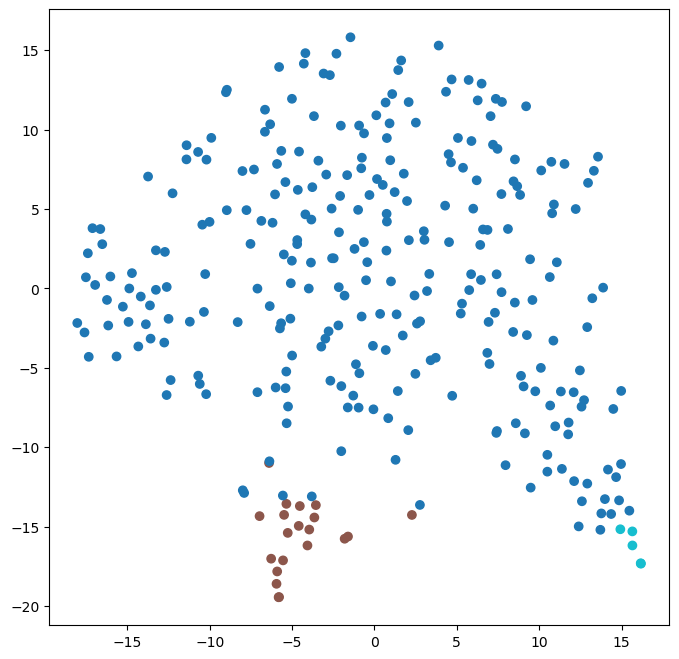

In [17]:
kmeans = KMeans(n_clusters=3)
best_clusters = kmeans.fit_predict(df_train)

tsne = TSNE(n_components=2, random_state=42)
embeddings = tsne.fit_transform(df_train)

plt.figure(figsize=(15, 15))
plt.figure(figsize=(8, 8))
scatter = plt.scatter(embeddings[:, 0], embeddings[:, 1], c=best_clusters, cmap='tab10')
plt.show();

# Hierarchical Clustering

- Here I am taking a range of k values from 2 to 40.
- Then calculating silhouette_score, davies_bouldin_score for each iteration seperately and storing them in arrays

In [18]:
k_values = range(2, 41)
sil_scores = []
dbi_scores = []

for k in k_values:
    hierarchical = AgglomerativeClustering(n_clusters=k)
    cluster_labels = hierarchical.fit_predict(df_train)
    score = silhouette_score(df_train, cluster_labels)
    dbi_scores.append(davies_bouldin_score(df_train, cluster_labels))
    sil_scores.append(score)

## Plot of Silhouette Scores along K values

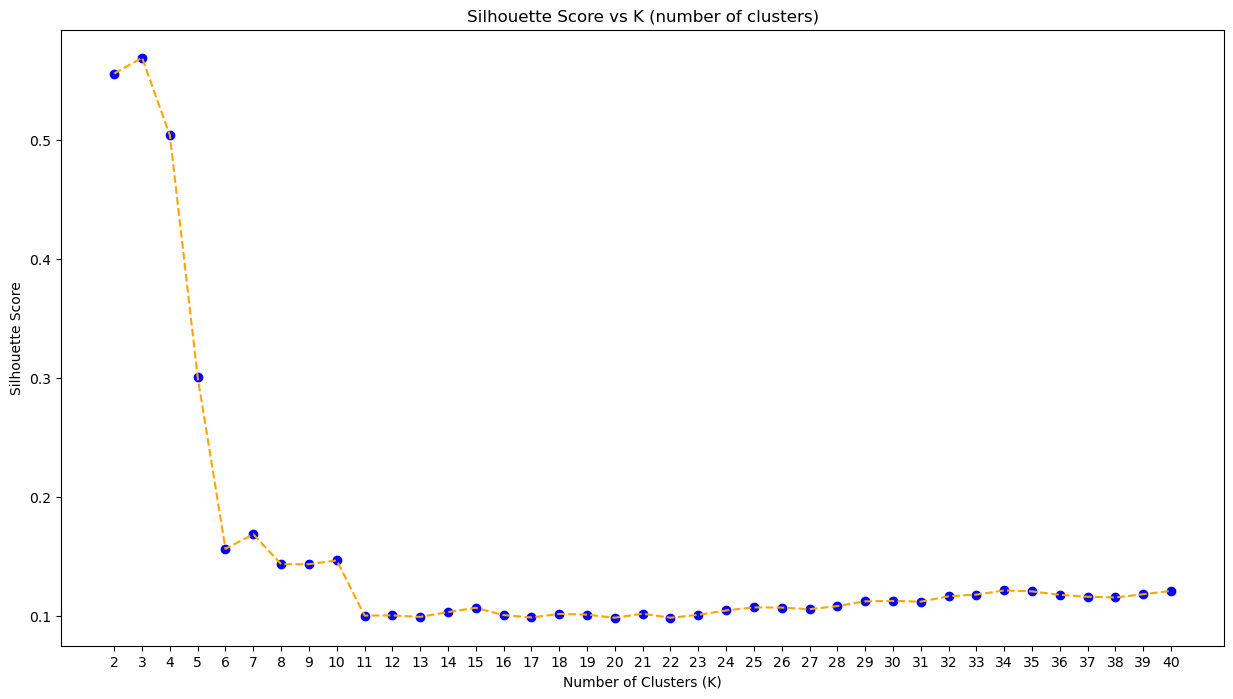

In [19]:
plt.figure(figsize=(15, 8))
plt.scatter(k_values, sil_scores, color='blue')
plt.plot(k_values, sil_scores, color='orange', linestyle='--')
plt.title("Silhouette Score vs K (number of clusters)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.show()

# Plot of Davies Bouldin Scores along K values

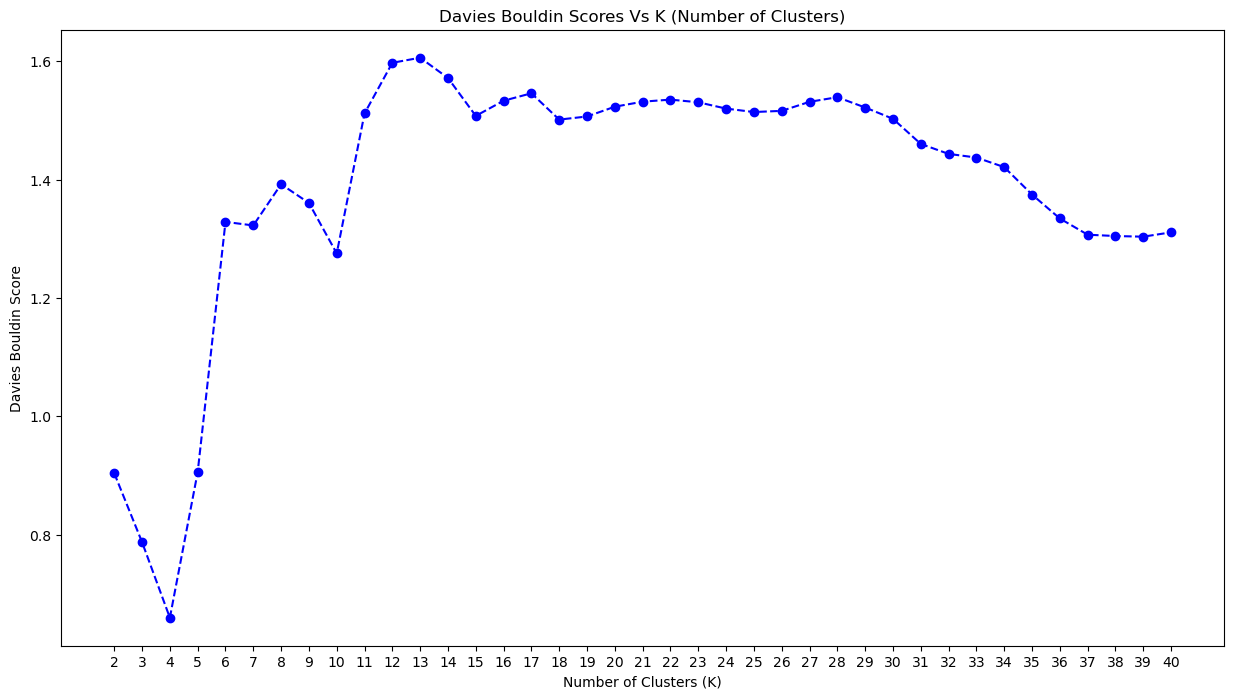

In [20]:
plt.figure(figsize=(15, 8))
plt.plot(k_values, dbi_scores, 'o--', color='blue')
plt.title("Davies Bouldin Scores Vs K (Number of Clusters)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Davies Bouldin Score")
plt.xticks(k_values)
plt.show()

## Best Hierarchical Cluster

In [21]:
hierarchical = AgglomerativeClustering(n_clusters=3)
clusters = hierarchical.fit_predict(df_train)

In [22]:
score = silhouette_score(df_train, clusters)
dbi = davies_bouldin_score(df_train, clusters)
print("Silhouette Score:", score)
print("Davies Bouldin Score:", dbi)

Silhouette Score: 0.5692518089102345
Davies Bouldin Score: 0.7873710254890057


## 2D plot of Best Hierarchical Cluster along the data using TSNE

<Figure size 1500x1500 with 0 Axes>

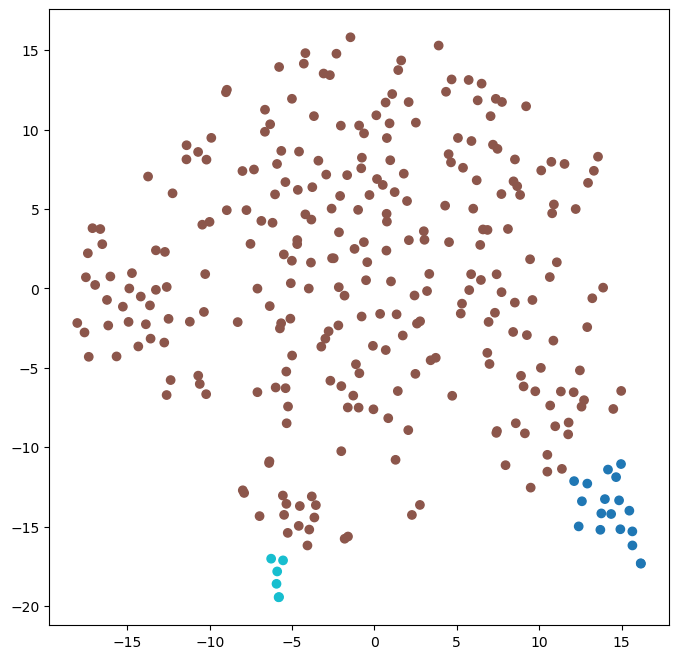

In [23]:
hierarchical = AgglomerativeClustering(n_clusters=3)
best_clusters = hierarchical.fit_predict(df_train)

tsne = TSNE(n_components=2, random_state=42)
embeddings = tsne.fit_transform(df_train)

plt.figure(figsize=(15, 15))
plt.figure(figsize=(8, 8))
scatter = plt.scatter(embeddings[:, 0], embeddings[:, 1], c=best_clusters, cmap='tab10')
plt.show();